# scRNAseq

In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")

include("Load_scRNAseqData.jl")

sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
sce = SingleCellExperiment.fit_single_cell_logistic_regression(sce, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = SingleCellExperiment.Shalek2014_module_score(collect(bhattgenes), sce,fitparameter = "mu", modulescore_name = :BhattGenesScore, untreated_pattern = "UT",comparedtothissample = "WT", assay = "CPM")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


SingleCellExp
Cells = 1362, Genes = 17938
assays : CPM lnCPMplus1
colData : RowName Genotype Sample Timepoint CellID TotalCounts TotalGenes B0 B1 BhattGenesScore
rowData : GeneID TotalCounts TotalCells FractionCells WT_UT__mu WT_UT__std WT_UT__alpha WT_UT__averagepop WT_UT__var RAD21_UT__mu RAD21_UT__std RAD21_UT__alpha RAD21_UT__averagepop RAD21_UT__var WT_2H__mu WT_2H__std WT_2H__alpha WT_2H__averagepop WT_2H__var RAD21_2H__mu RAD21_2H__std RAD21_2H__alpha RAD21_2H__averagepop RAD21_2H__var WT_8H__mu WT_8H__std WT_8H__alpha WT_8H__averagepop WT_8H__var RAD21_8H__mu RAD21_8H__std RAD21_8H__alpha RAD21_8H__averagepop RAD21_8H__var All__mu All__std All__alpha All__averagepop All__var
reducedDimNames :

In [2]:
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "lnCPMplus1")

bhattgenes= DataFrames.DataFrame(
    "GeneID" => Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol], 
    "Class"=>Bhatt2012.inducible_genes_figure3()[!,:Class]
    );
sceBhatt = innerjoin(sce.rowData, bhattgenes,on = :GeneID);

In [3]:
println("ln CPM plus 1 in expressing cells")
println("WT UT vs Rad21KO UT")

t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_UT__mu"]], [ii for ii in sceBhatt[!,"RAD21_UT__mu"]])
println(t)
p1 = pvalue(t)


println("Fraction Expressing cells")
println("WT UT vs Rad21KO UT")

t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_UT__alpha"]], [ii for ii in sceBhatt[!,"RAD21_UT__alpha"]])
println(t)
p1a = pvalue(t)

ln CPM plus 1 in expressing cells
WT UT vs Rad21KO UT
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.170879
    95% confidence interval: (0.1542, 0.1995)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-37

Details:
    number of observations:      497
    Wilcoxon rank-sum statistic: 97837.0
    rank sums:                   [97837.0, 18566.0]
    adjustment for ties:         0.0
    normal approximation (μ, σ): (39635.5, 3059.53)

Fraction Expressing cells
WT UT vs Rad21KO UT
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0155742
    95% confidence interval: (0.01956, 0.02967)

Test summary:
    o

5.046706485254621e-28

In [4]:
println("ln CPM plus 1 in expressing cells")
println("WT 2H vs Rad21KO 2H")

t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_2H__mu"]], [ii for ii in sceBhatt[!,"RAD21_2H__mu"]])
println(t)
p2 = pvalue(t)

println("Fraction Expressing cells")
println("WT 2H vs Rad21KO 2H")

t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_2H__alpha"]], [ii for ii in sceBhatt[!,"RAD21_2H__alpha"]])
println(t)
p2a = pvalue(t)




ln CPM plus 1 in expressing cells
WT 2H vs Rad21KO 2H
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0330481
    95% confidence interval: (-0.005356, 0.05443)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1074

Details:
    number of observations:      497
    Wilcoxon rank-sum statistic: 66770.0
    rank sums:                   [66770.0, 56486.0]
    adjustment for ties:         0.0
    normal approximation (μ, σ): (5142.0, 3193.66)

Fraction Expressing cells
WT 2H vs Rad21KO 2H
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0376344
    95% confidence interval: (0.04301, 0.05914)

Test su

2.2779482647126536e-39

In [5]:
println("ln CPM plus 1 in expressing cells")
println("WT 8H vs Rad21KO 8H")
using HypothesisTests
t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_8H__mu"]], [ii for ii in sceBhatt[!,"RAD21_8H__mu"]])
println(t)
p3 = pvalue(t)
println("Fraction Expressing cells")

println("WT 8H vs Rad21KO 8H")
using HypothesisTests
t = HypothesisTests.SignedRankTest([ii for ii in sceBhatt[!,"WT_8H__alpha"]], [ii for ii in sceBhatt[!,"RAD21_8H__alpha"]])
println(t)
p3a = pvalue(t)


ln CPM plus 1 in expressing cells
WT 8H vs Rad21KO 8H
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.34752
    95% confidence interval: (0.3302, 0.384)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-66

Details:
    number of observations:      497
    Wilcoxon rank-sum statistic: 116375.0
    rank sums:                   [116375.0, 6385.0]
    adjustment for ties:         0.0
    normal approximation (μ, σ): (54995.0, 3184.01)

Fraction Expressing cells
WT 8H vs Rad21KO 8H
Approximate Wilcoxon signed rank test
-------------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0384241
    95% confidence interval: (0.04905, 0.07381)

Test summary:
    ou

3.842026142569548e-27

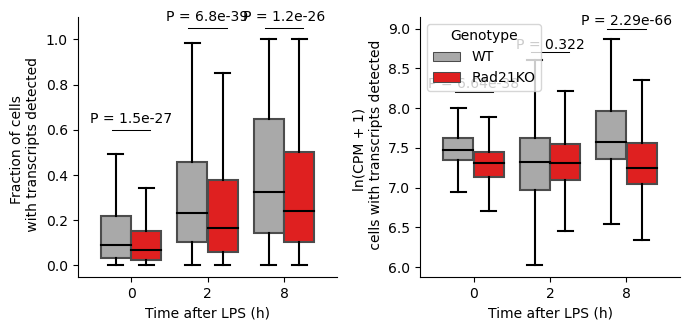

In [6]:
figure(figsize = (7, 6))


subplot(1,2,2)
y = "ln(CPM + 1) \n cells with transcripts detected"
pd = Pandas.DataFrame(sort!(sceBhatt, :Class))

pd = Pandas.melt(pd, value_vars  = ["WT_UT__mu", "RAD21_UT__mu" ,"WT_2H__mu", "RAD21_2H__mu", "WT_8H__mu", "RAD21_8H__mu"], value_name = y, id_vars = ["GeneID","Class"] )
pd["Time after LPS (h)"] = [replace(replace(replace(split(ii, "_")[2], "UT" => 0), "2H" => 2), "8H" => 8) for ii in pd["variable"]]
pd["Genotype"] = [replace(split(ii, "_")[1], "RAD21" =>"Rad21KO") for ii in pd["variable"]]

Seaborn.boxplot(data = pd, y = y,x = "Time after LPS (h)", hue = "Genotype",showfliers = false,  palette = ["darkgray", "red"])
pretty_axes2()

hs = [8.2, 8.7, 9.0]
ps = adjust([p1,p2,p3], Bonferroni())

for ii in 1:length(hs)
plt.plot([-0.25+ii-1, 0.25+ii-1], [hs[ii], hs[ii]], lw = 0.75, c= "black")
annotate("P = "*string(round(ps[ii], sigdigits = 3)),xy = [ii-1, hs[ii]+0.1], va = "center", ha = "center")
end
squareplot()

ax = gca()
for line in ax.get_lines()
    line.set_color("black")
end
subplot(1,2,1)



y = "Fraction of cells \n with transcripts detected"
pd = Pandas.DataFrame(sort!(sceBhatt, :Class))

pd = Pandas.melt(pd, value_vars  = ["WT_UT__alpha", "RAD21_UT__alpha" ,"WT_2H__alpha", "RAD21_2H__alpha", "WT_8H__alpha", "RAD21_8H__alpha"], value_name = y, id_vars = ["GeneID","Class"] )
pd["Time after LPS (h)"] = [replace(replace(replace(split(ii, "_")[2], "UT" => 0), "2H" => 2), "8H" => 8) for ii in pd["variable"]]
pd["Genotype"] = [replace(split(ii, "_")[1], "RAD21" =>"Rad21KO") for ii in pd["variable"]]

Seaborn.boxplot(data = pd, y = y,x = "Time after LPS (h)", hue = "Genotype",showfliers = false, palette = ["darkgray", "red"])
pretty_axes2()

hs = [0.6, 1.05, 1.05]
ps = adjust([p1a,p2a,p3a], Bonferroni())

for ii in 1:length(hs)
plt.plot([-0.25+ii-1, 0.25+ii-1], [hs[ii], hs[ii]], lw = 0.75, c= "black")
annotate("P = "*string(round(ps[ii], sigdigits = 2)),xy = [ii-1, hs[ii]+0.05], va = "center", ha = "center")
end

legend_removal()

ylim(-0.05, 1.1)
squareplot()
ax = gca()
for line in ax.get_lines()
    line.set_color("black")
end
plt.tight_layout()
savefigwithtext("scRNAseq_mu_alpha_bhattgenes_WTRad21KO.svg")

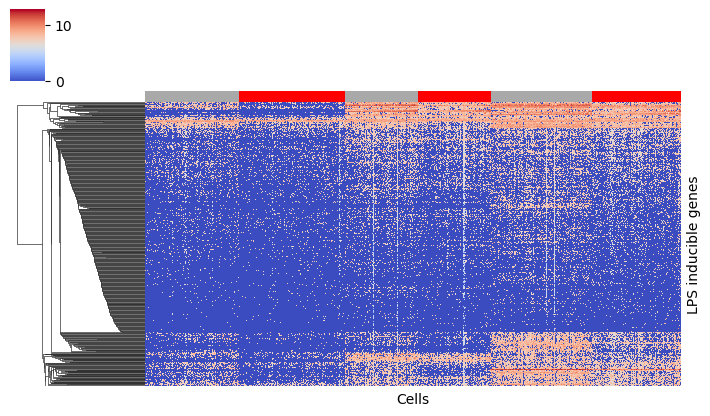

/Users/irr15/.julia/conda/3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [7]:
col_colors_dict = Dict(
    "WT_UT" => "#f0f0f0",
    "WT_2H" => "#bdbdbd",
    "WT_8H" => "#636363",
    "RAD21_UT" => "#fee0d2",
    "RAD21_2H" => "#fc9272",
    "RAD21_8H" => "#de2d26",
    "RAD21" => "red",
    "WT" => "darkgrey",
    0 => "#deebf7",
    2 => "#9ecae1",
    8 => "#3182bd",
    ) 


sce.colData[!,"LPS"] = [replace(replace(replace(split(ii, "_")[2], "UT" => 0), "2H" => 2), "8H" => 8) for ii in sce.colData[!,"Sample"]]


sce = sort_cells!(sce, cols = [ :LPS, :Genotype,:BhattGenesScore], rev = [false, true, false])
subsce = select_these_genes(bhattgenes[!,:GeneID], sce)

g = Seaborn.clustermap(subsce.assays["lnCPMplus1"], figsize = (7, 4),yticklabels=false,xticklabels=false, col_cluster = false, col_colors = [col_colors_dict[ii] for ii in subsce.colData[!,:Genotype]], cmap="coolwarm")

ax = g.ax_heatmap
ax.set_ylabel("LPS inducible genes")
ax.set_xlabel("Cells")
ax.tick_params(axis="both", which="both", length=0)

savefigwithtext("scRNAseq_heatmap_bhattgenes_WTRad21KO.pdf")

In [9]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [f8716d33] MultipleTesting v0.5.0
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
